# Using Command-Line Interface (CLI) from Notebook

This example notebook is a supplement to the ANDES tutorial. Make sure you have read the tutorial on using the CLI first.

A brief version can be found at https://github.com/cuihantao/andes/blob/master/README.md#run-simulations

## The `!` magic in iPython

This example shows how to use the ANDES CLI from Jupyter Notebook.

It is based on the iPython magic `!`. To run a shell command from within iPython or notebook, place a `!` before the command.

All the commands demonstrated in this notebook can be used in a terminal/shell by removing the preceeding `!` sign.

For example, to list the directory , use `!ls`. This is equivalent to running `ls` from the terminal.

In [1]:
!ls

'1. simulate_and_plot.ipynb'  '5. profiling.ipynb'
'2. inspect_data.ipynb'       '6. using-cli-from-notebook.ipynb'
'3. eigenvalue.ipynb'	      '7. parallel-simulation.ipynb'
'4. inspect_models.ipynb'


Likewise, to run `andes`, use `!andes`. Addition arguments can be passed as usual.

In [2]:
!andes


    _           _         | Version 0.8.8.post41.dev0+g56198e1
   /_\  _ _  __| |___ ___ | Python 3.7.3 on Linux, 05/02/2020 12:57:33 PM
  / _ \| ' \/ _` / -_|_-< | 
 /_/ \_\_||_\__,_\___/__/ | This program comes with ABSOLUTELY NO WARRANTY.

usage: andes [-h] [-v {1,10,20,30,40,50}]
             {run,plot,doc,misc,prepare,selftest} ...

positional arguments:
  {run,plot,doc,misc,prepare,selftest}
                        [run] run simulation routine; [plot] plot simulation
                        results; [doc] quick documentation; [prepare] run the
                        symbolic-to-numeric preparation; [misc] miscellaneous
                        functions.

optional arguments:
  -h, --help            show this help message and exit
  -v {1,10,20,30,40,50}, --verbose {1,10,20,30,40,50}
                        Program logging level in 10-DEBUG, 20-INFO,
                        30-WARNING, 40-ERROR or 50-CRITICAL.


## Run a simulation

Pass the path to the case file and other arguments to andes from the command line as follows.

In [3]:
!andes run ../andes/cases/kundur/kundur_full.xlsx -r tds


    _           _         | Version 0.8.8.post41.dev0+g56198e1
   /_\  _ _  __| |___ ___ | Python 3.7.3 on Linux, 05/02/2020 12:57:35 PM
  / _ \| ' \/ _` / -_|_-< | 
 /_/ \_\_||_\__,_\___/__/ | This program comes with ABSOLUTELY NO WARRANTY.

Working directory: "/home/hcui7/repos/andes/examples"
Parsing input file "../andes/cases/kundur/kundur_full.xlsx"
Input file parsed in 0.0817 seconds.

-> Power flow calculation
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0082 seconds.
Report saved to "kundur_full_out.txt" in 0.0007 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-20.0sec.
Fixed step size: h=33.33msec., shrink if not converged
Initialization was successful in 0.0190 seconds.
<Toggle 1>: Status of Line.Line_8 changed to 0.0 at t=2.0sec.         
100%|████████████████████████████████| 100/100 [00:02<00:0

Case file names can be separated from the path, which can be passed to `-p`. The above command is equivanent to

In [4]:
!andes run kundur_full.xlsx -p "../andes/cases/kundur/" -r tds


    _           _         | Version 0.8.8.post41.dev0+g56198e1
   /_\  _ _  __| |___ ___ | Python 3.7.3 on Linux, 05/02/2020 12:57:39 PM
  / _ \| ' \/ _` / -_|_-< | 
 /_/ \_\_||_\__,_\___/__/ | This program comes with ABSOLUTELY NO WARRANTY.

Working directory: "/home/hcui7/repos/andes/examples"
Parsing input file "../andes/cases/kundur/kundur_full.xlsx"
Input file parsed in 0.0627 seconds.

-> Power flow calculation
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0078 seconds.
Report saved to "kundur_full_out.txt" in 0.0009 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-20.0sec.
Fixed step size: h=33.33msec., shrink if not converged
Initialization was successful in 0.0170 seconds.
<Toggle 1>: Status of Line.Line_8 changed to 0.0 at t=2.0sec.         
100%|████████████████████████████████| 100/100 [00:01<00:0

### PSS/E RAW and DYR Files

To run a simulation using PSS/E raw and dyr files, pass the dyr file to argument `--addfile`. 

For example:

In [5]:
!andes run kundur_full.raw --addfile kundur_full.dyr -p="../andes/cases/kundur" -r tds


    _           _         | Version 0.8.8.post41.dev0+g56198e1
   /_\  _ _  __| |___ ___ | Python 3.7.3 on Linux, 05/02/2020 12:57:43 PM
  / _ \| ' \/ _` / -_|_-< | 
 /_/ \_\_||_\__,_\___/__/ | This program comes with ABSOLUTELY NO WARRANTY.

Working directory: "/home/hcui7/repos/andes/examples"
Parsing input file "../andes/cases/kundur/kundur_full.raw"
  MODIFIED KUNDUR'S TWO-AREA TEST SYSTEM, DISTRIBUTED WITH ANDES
  SEE THE BOOK "POWER SYSTEM STABILITY AND CONTROL" FOR ORIGINAL DATA
Input file parsed in 0.0029 seconds.
Parsing additional file "../andes/cases/kundur/kundur_full.dyr"
PSS/E dyr support is experimental.
Addfile parsed in 0.0353 seconds.

-> Power flow calculation
Method: NR method
Power flow initialized.
0: |F(x)| = 3.17585   
1: |F(x)| = 3.17626e-06
2: |F(x)| = 3.33604e-10
Converged in 3 iterations in 0.0034 seconds.
Report saved to "kundur_full_out.txt" in 0.0006 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-20.0sec.
Fixed step 

## Check the output `lst` file

In [6]:
!cat kundur_full_out.lst

     0,                  Time [s],                            Time [s]
     1,            delta GENROU 1,                   $\delta$ GENROU 1
     2,            delta GENROU 2,                   $\delta$ GENROU 2
     3,            delta GENROU 3,                   $\delta$ GENROU 3
     4,            delta GENROU 4,                   $\delta$ GENROU 4
     5,            omega GENROU 1,                   $\omega$ GENROU 1
     6,            omega GENROU 2,                   $\omega$ GENROU 2
     7,            omega GENROU 3,                   $\omega$ GENROU 3
     8,            omega GENROU 4,                   $\omega$ GENROU 4
     9,              e1q GENROU 1,                     $e'_q$ GENROU 1
    10,              e1q GENROU 2,                     $e'_q$ GENROU 2
    11,              e1q GENROU 3,                     $e'_q$ GENROU 3
    12,              e1q GENROU 4,                     $e'_q$ GENROU 4
    13,              e1d GENROU 1,                     $e'_d$ GENROU 1
    14

Windows users may not have `cat` by default in the search path. Do instead

```
with open('kundur_full_out.lst', 'r') as f:
    print(f.read())
```

## Plot and save to file

We found a limitation of using `andes plot` from within Notebook/iPython. The figure won't be displayed correctly. The workaround is to save the image as a file and display it from the notebook.

Please let us know if you have better solutions.

In [7]:
!andes plot kundur_full_out.lst 0 5 6 --save

Figure saved to "kundur_full_out_1.png".
Figure(640x480)


## Display image

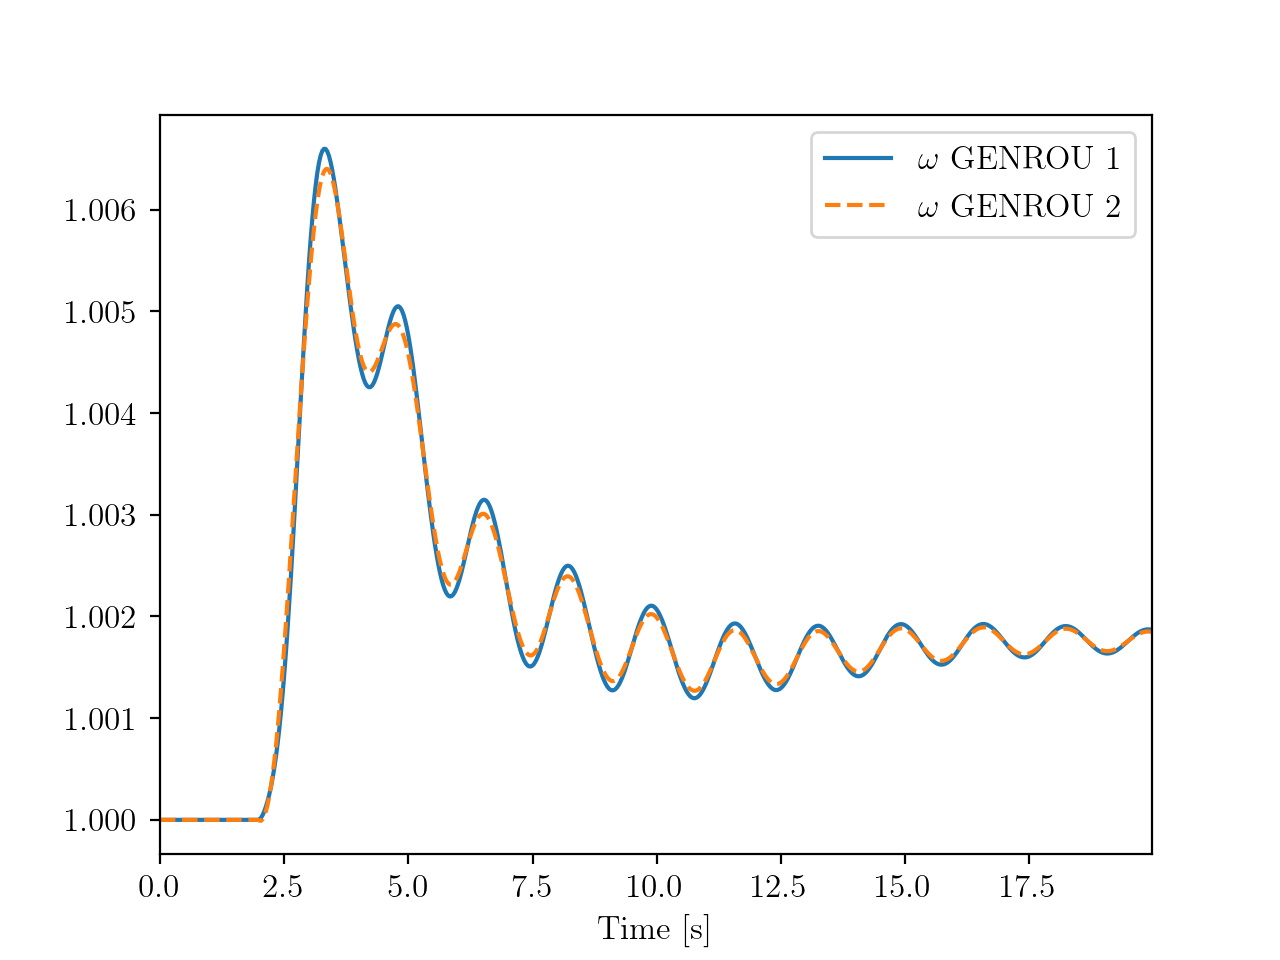

In [8]:
from IPython.display import Image
Image("kundur_full_out_1.png")

## Using `xargs` for index loop up

A convenient tool in Linux/macOS is `xargs`, which turns the standard output of one program into arguments for another.

`andes plot --xargs` accepts an input of search pattern for variable names and returns a list of arguments, including the matched indices, that can be understood by `andes plot`.


A convenient tool in Linux/macOS is `xargs`, which turns the standard output of one program into arguments for another.

`andes plot --xargs` accepts an input of search pattern for variable names and returns a list of arguments, including the matched indices, that can be understood by `andes plot`.


## Using `xargs` for index loop up

A convenient tool in Linux/macOS is `xargs`, which turns the standard output of one program into arguments for another.

`andes plot --xargs` accepts an input of search pattern for variable names and returns a list of arguments, including the matched indices, that can be understood by `andes plot`.


To illustrate, let's look at an example output of `andes plot --xargs`.

In [9]:
!andes plot kundur_full_out.lst --xargs "omega GENROU"

kundur_full_out.lst 0 5 6 7 8


The output consists of the lst file name, the default x-axis index `0`, and the indices for the found variables. The full output can be passed to `andes plot` without modification.

We use the following command to pass the arguments:

In [10]:
!andes plot kundur_full_out.lst --xargs "omega GENROU" | xargs andes plot

Figure(640x480)


where `|` is the pipe operator in shell for piping the standard output of the left-hand side to the right-hand side, `xargs` captures the pipe-in and appends it to `andes plot`. 

The command is equivalent to manually running

In [11]:
!andes plot kundur_full_out.lst 5 6 7 8

Figure(640x480)


## Cleanup

Remove the saved `png` image files.

In [12]:
!rm -v *.png

removed 'kundur_full_out_1.png'


In [13]:
!andes misc -C


    _           _         | Version 0.8.8.post41.dev0+g56198e1
   /_\  _ _  __| |___ ___ | Python 3.7.3 on Linux, 05/02/2020 12:58:06 PM
  / _ \| ' \/ _` / -_|_-< | 
 /_/ \_\_||_\__,_\___/__/ | This program comes with ABSOLUTELY NO WARRANTY.

<kundur_full_out.txt> removed.
<kundur_full_out.lst> removed.
<kundur_full_out.npy> removed.
